# Bank Customer Churn: EDA and Classification Modeling

## Introduction

#### This analysis was performed following the Data Science Methodology (DSM), as proposed in Data Science Using Python and R (Larose, C. D., & Larose, D. T. 2019).

##### We will begin with viewing the content of our dataset available here on Kaggle (https://www.kaggle.com/mathchi/churn-for-bank-customers)


We have 14 variables: 11 numerical variables and 3 categorical variables.  Our churn variable “Exited” is the target variable for the classification models.


•	RowNumber—corresponds to the record (row) number and has no effect on the output.

•	CustomerId—contains random values and has no effect on customer leaving the bank.

•	Surname—the surname of a customer has no impact on their decision to leave the bank.

•	CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

•	Geography—a customer’s location can affect their decision to leave the bank.

•	Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

•	Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

•	Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

•	Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less       likely to leave the bank compared to those with lower balances.

•	NumOfProducts—refers to the number of products that a customer has purchased through the bank.

•	HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

•	IsActiveMember—active customers are less likely to leave the bank.

•	EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

•	Exited—whether or not the customer left the bank.


### Table of Contents

* [1. Problem Solving Phase](#chapter1)

* [2. Data Preparation Phase](#chapter2)

* [3. Exploratory Data Analysis (EDA) Phase](#chapter3)

    * [Categorical Variables](#section_3_1)
    
    * [Numerical Variables](#section_3_2)
    
    * [Correlation Heatmap](#section_3_3)
    
* [4. Setup Phase](#chapter4)

    * [Outliers](#section_4_1)
    
    * [Creating Indicator Variables](#section_4_2)
    
    * [Data Partition](#section_4_3)
    
* [5. Modeling Phase](#chapter5)

    * [Decision Tree](#section_5_1)
    
    * [Logistic Regression](#section_5_2)
    
    * [Random Forest](#section_5_3)
    
* [6. Evaluation Phase](#chapter6)

    * [Model Performance](#section_6_1)
    
    * [Feature Importance](#section_6_2)

* [7. Deployment Phase](#chapter7)

### Problem Solving Phase <a class="anchor" id="chapter1"></a>

Our problem with the dataset is that customers are churning, which results in a loss in revenue for the bank.  We begin with exploratory data analysis, which shows the relationship between each variable and the target variable, "Exited".  

Once complete, three types of classification models will be created to predict whether or not a customer will churn.  The optimal model is chosen based on accuracy, sensitivity, and specificity.  These models can be used by banks to predict potential churners, which can save the banks from losing customers (assuming some intervention by the bank).  

Lastly, we will view the feature importance from the optimal model to determine the most influencial features for predicting churn.

### Data Preparation Phase <a class="anchor" id="chapter2"></a>

In [1]:
# We begin by importing the necessary packages and looking at the structure of the data

# Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import os

In [2]:
# Establish Working Directory

os.chdir("/Users/danielborrero/Documents/Python")

In [3]:
# Import Dataset

data=pd.read_csv("churn.csv")
df=data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Check for Null Values

df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
# Drop Unneeded Columns

df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [8]:
# Renaming Columns for Simplicity 

df.rename(columns={"Exited":"Churn", "Geography":"Country"}, inplace=True)
df.columns

Index(['CreditScore', 'Country', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

###### After the Data Preparation phase we are left with 11 variables and the same 10,000 records

### Exploratory Data Analysis (EDA) <a class="anchor" id="chapter3"></a>

We will begin by analyzing each variable along with our target variable 'Churn'.

For each variable, we will copy our data and find the Rate of Churn.  This will be used for our plots.

#### Categorical Variables <a class="anchor" id="section_3_1"></a>

In [9]:
# Copy Dataset and Create New Columns to Calculate Rate of Churn "Rate_Churn" by "Country"

c_coun=df.copy()
c_coun['Count_Churn'] = c_coun.groupby('Country')['Churn'].transform('count')
c_coun['Sum_Churn'] = c_coun.groupby('Country')['Churn'].transform(np.sum)
c_coun['Rate_Churn']=c_coun['Sum_Churn']/c_coun['Count_Churn']
c_coun.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,5014,810,0.161548
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2477,413,0.166734
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,5014,810,0.161548
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5014,810,0.161548
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2477,413,0.166734


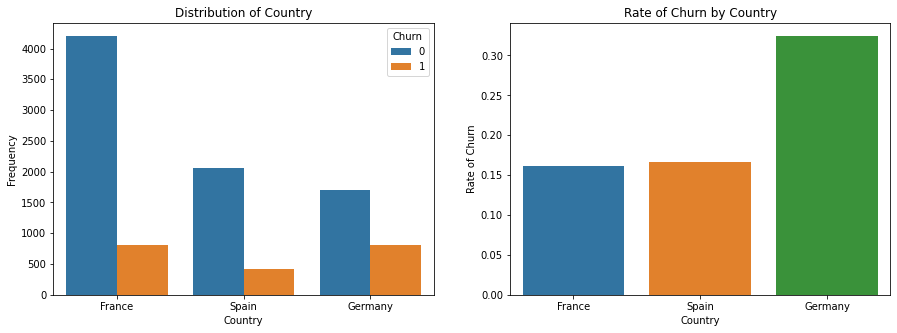

In [10]:
# Plots for 'Country' Variable

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))

sns.countplot(x = 'Country', hue = "Churn" , data = c_coun, ax=ax1)
ax1.set(xlabel='Country', ylabel='Frequency', title='Distribution of Country')

sns.barplot(x = 'Country', y="Rate_Churn", data = c_coun, ax=ax2)
ax2.set(xlabel='Country', ylabel='Rate of Churn', title='Rate of Churn by Country')

plt.show()

- France has the highest population.
- Spain and Germany have roughly the same population, about half that of France.
- Customers in France and Spain have roughly the same churn rate, while Germany's is about double.

In [11]:
# Copy Dataset and Create New Columns to Calculate Rate of Churn "Rate_Churn" by "Gender"

c_gen=df.copy()
c_gen['Count_Churn'] = c_gen.groupby('Gender')['Churn'].transform('count')
c_gen['Sum_Churn'] = c_gen.groupby('Gender')['Churn'].transform(np.sum)
c_gen['Rate_Churn']=c_gen['Sum_Churn']/c_gen['Count_Churn']
c_gen.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,4543,1139,0.250715
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,4543,1139,0.250715
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4543,1139,0.250715
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,4543,1139,0.250715
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,4543,1139,0.250715


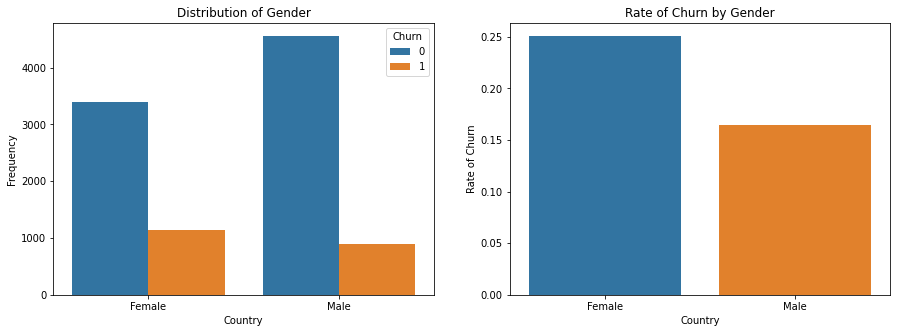

In [12]:
# Plots for 'Gender' Variable

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))

sns.countplot(x = 'Gender', hue = "Churn" , data = c_gen, ax=ax1)
ax1.set(xlabel='Country', ylabel='Frequency', title='Distribution of Gender')

g= sns.barplot(x = 'Gender', y="Rate_Churn", data = c_gen, ax=ax2)
ax2.set(xlabel='Country', ylabel='Rate of Churn', title='Rate of Churn by Gender')

plt.show()

- There are more male customers than female, but the churn rate is similar.

#### Numerical Variables <a class="anchor" id="section_3_2"></a>

In [13]:
# Binning 'CreditScore'

c_cs=df.copy()
bins1=[300, 400, 500, 600, 700, 800, 900]
c_cs['Binned_cs']=pd.cut(c_cs['CreditScore'],bins1).astype('object')
c_cs.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Binned_cs
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(600, 700]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(600, 700]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(500, 600]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(600, 700]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(800, 900]"


In [14]:
c_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Country          10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churn            10000 non-null  int64  
 11  Binned_cs        10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [15]:
# Copy Dataset and Create New Columns to Calculate Rate of Churn "Rate_Churn" by "Binned_cs"

c_cs['Count_Churn'] = c_cs.groupby('Binned_cs')['Churn'].transform('count')
c_cs['Sum_Churn'] = c_cs.groupby('Binned_cs')['Churn'].transform(np.sum)
c_cs['Rate_Churn']=c_cs['Sum_Churn']/c_cs['Count_Churn']
c_cs.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Binned_cs,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(600, 700]",3818,753,0.197224
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(600, 700]",3818,753,0.197224
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(500, 600]",2423,513,0.211721
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(600, 700]",3818,753,0.197224
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(800, 900]",645,127,0.196899


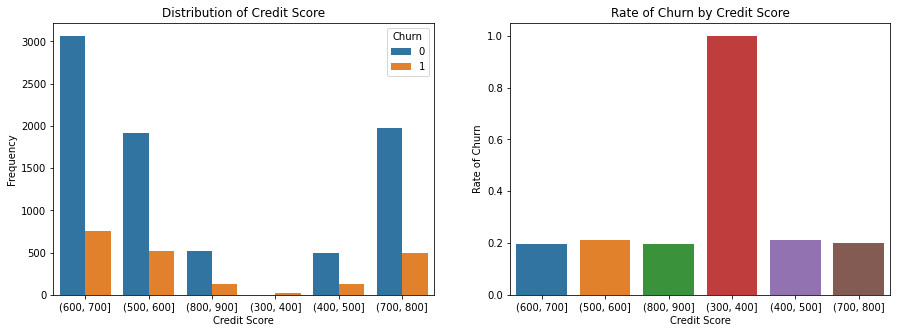

In [16]:
# Plots for 'Binned_cs' Variable

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))

sns.countplot(x = 'Binned_cs', hue = "Churn", data = c_cs, ax=ax1)
ax1.set(xlabel='Credit Score', ylabel='Frequency', title='Distribution of Credit Score')
sns.barplot(x = 'Binned_cs', y="Rate_Churn", data = c_cs, ax=ax2)
ax2.set(xlabel='Credit Score', ylabel='Rate of Churn', title='Rate of Churn by Credit Score')
# order=[(300, 400], (400, 500], (500, 600], (600, 700], (700, 800], (800, 900]]
plt.show()

- Between 600-700 is the most common credit score, with 500-600 and 700-800 being second most popular.
- Less than 1000 customers have credit scores between 400-500 or 800-900.
- All the bins except for 300-400 have similar churn rates. 
- Since very customers have credit scores between 300-400 and the churn rate is 100%, these are possible outliers.

In [17]:
# Copy Dataset and Create New Columns to Calculate Rate of Churn "Rate_Churn" by "Age"

c_age=df.copy()
c_age['Count_Churn'] = c_age.groupby('Age')['Churn'].transform('count')
c_age['Sum_Churn'] = c_age.groupby('Age')['Churn'].transform(np.sum)
c_age['Rate_Churn']=c_age['Sum_Churn']/c_age['Count_Churn']
c_age.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,321,77,0.239875
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,366,69,0.188525
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,321,77,0.239875
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,423,72,0.170213
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,297,88,0.296296


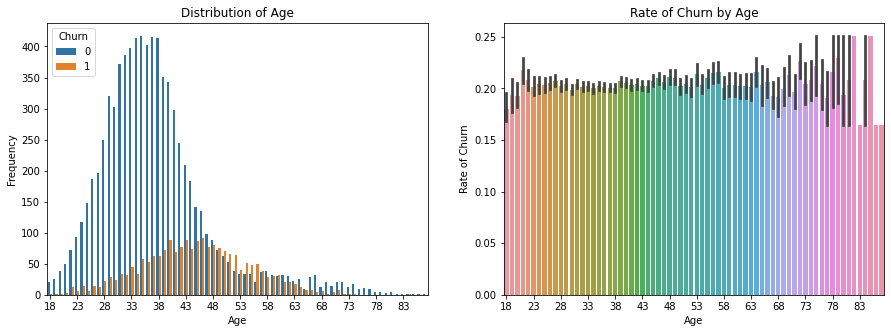

In [18]:
# Plots for 'Age' Variable

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))

sns.countplot(x = 'Age', hue = "Churn" , data = c_age, ax=ax1)
ax1.set(xlabel='Age', ylabel='Frequency', title='Distribution of Age')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=5))

sns.barplot(x = 'Age', y="Rate_Churn", data = c_gen, ax=ax2)
ax2.set(xlabel='Age', ylabel='Rate of Churn', title='Rate of Churn by Age')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=5))

plt.show()

- The distribution of age is right-skewed with a maximum in the mid 30's.
- The rate of churn tends to increase slightly as age increases.  The rate is highest for customers around age 83.

In [19]:
# Copy Dataset and Create New Columns to Calculate Rate of Churn "Rate_Churn" by "Tenure"

c_ten=df.copy()
c_ten['Count_Churn'] = c_ten.groupby('Tenure')['Churn'].transform('count')
c_ten['Sum_Churn'] = c_ten.groupby('Tenure')['Churn'].transform(np.sum)
c_ten['Rate_Churn']=c_ten['Sum_Churn']/c_ten['Count_Churn']
c_ten.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1048,201,0.191794
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1035,232,0.224155
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1025,197,0.192195
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1035,232,0.224155
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1048,201,0.191794


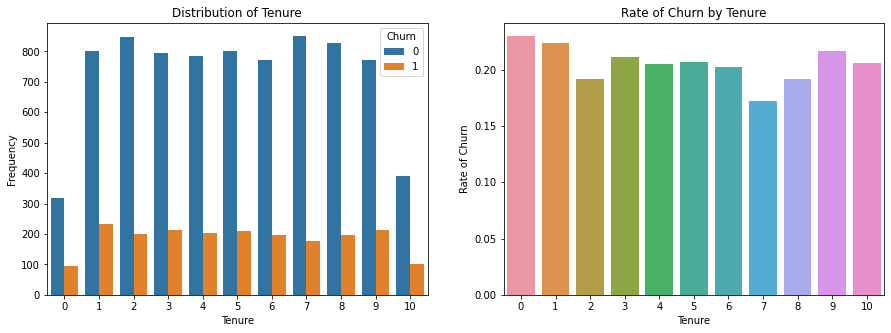

In [20]:
# Plots for 'Tenure' Variable

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))

sns.countplot(x = 'Tenure', hue = "Churn" , data = c_ten, ax=ax1)
ax1.set(xlabel='Tenure', ylabel='Frequency', title='Distribution of Tenure')

sns.barplot(x = 'Tenure', y="Rate_Churn", data = c_ten, ax=ax2)
ax2.set(xlabel='Tenure', ylabel='Rate of Churn', title='Rate of Churn by Tenure')

plt.show()

- The distribution of Tenure is quite symmetrical.  Tenures or 0 and 10 are least common.
- There is a general decrease in churn rate as tenure increases, however there is a spike at Tenure=9.

In [21]:
# Binning 'Balance'

c_bal=df.copy()
bins2=[-1, 50000, 100000, 150000, 200000, 250000] # -1 used to include 0.00 Balance in the bins
c_bal['Binned_bal']=pd.cut(c_cs['Balance'],bins2).astype('object')
c_bal.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Binned_bal
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(-1, 50000]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(50000, 100000]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(150000, 200000]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(-1, 50000]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(100000, 150000]"


In [22]:
# Copy Dataset and Create New Columns to Calculate Rate of Churn "Rate_Churn" by "Binned_bal"

c_bal['Count_Churn'] = c_bal.groupby('Binned_bal')['Churn'].transform('count')
c_bal['Sum_Churn'] = c_bal.groupby('Binned_bal')['Churn'].transform(np.sum)
c_bal['Rate_Churn']=c_bal['Sum_Churn']/c_bal['Count_Churn']
c_bal.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Binned_bal,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(-1, 50000]",3692.0,526.0,0.142470
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(50000, 100000]",1509.0,300.0,0.198807
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(150000, 200000]",935.0,205.0,0.219251
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(-1, 50000]",3692.0,526.0,0.142470
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(100000, 150000]",3830.0,987.0,0.257702


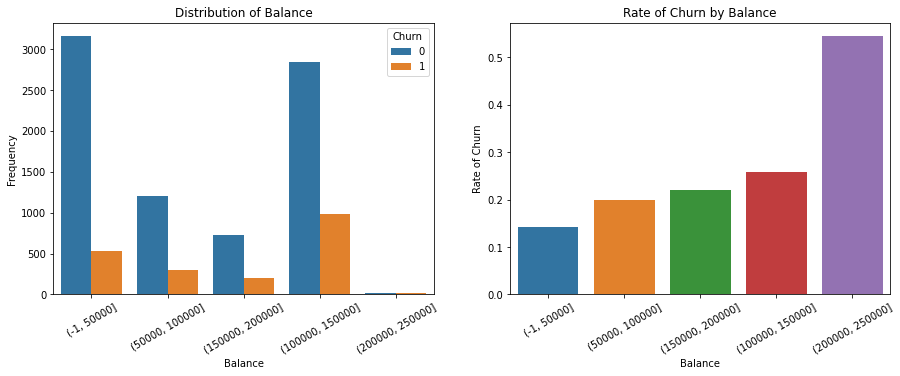

In [23]:
# Plots for 'Binned_bal' Variable

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))

sns.countplot(x = 'Binned_bal', hue = "Churn", data = c_bal, ax=ax1)
ax1.set(xlabel='Balance', ylabel='Frequency', title='Distribution of Balance')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30);

sns.barplot(x = 'Binned_bal', y="Rate_Churn", data = c_bal, ax=ax2)
ax2.set(xlabel='Balance', ylabel='Rate of Churn', title='Rate of Churn by Balance')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30);

plt.show()

- The bin of 50,000 or less has the most customers, followed by 100,000-150,000.
- The churn rate tends to increase as the balance increases.
- The churn rate is over 50% for balances over 200,000.  These may be outliers as there are very few customers with these high balances.

In [24]:
# Copy Dataset and Create New Columns to Calculate Rate of Churn "Rate_Churn" by "NumOfProducts"

c_nop=df.copy()
c_nop['Count_Churn'] = c_nop.groupby('NumOfProducts')['Churn'].transform('count')
c_nop['Sum_Churn'] = c_nop.groupby('NumOfProducts')['Churn'].transform(np.sum)
c_nop['Rate_Churn']=c_nop['Sum_Churn']/c_nop['Count_Churn']
c_nop.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,5084,1409,0.277144
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,5084,1409,0.277144
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,266,220,0.827068
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,4590,348,0.075817
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5084,1409,0.277144


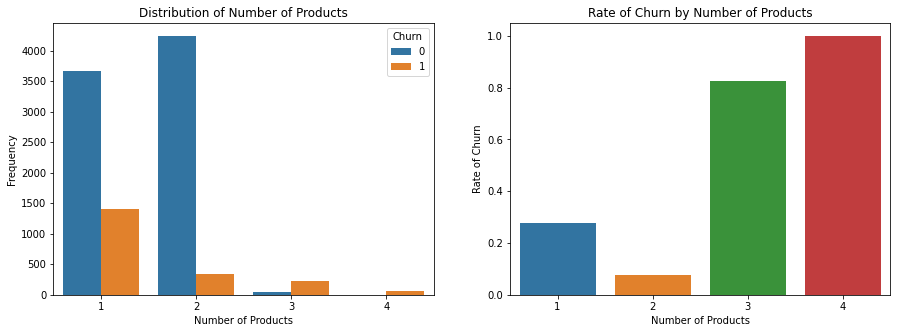

In [25]:
# Plots for 'NumOfProducts' Variable

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))

sns.countplot(x = 'NumOfProducts', hue = "Churn" , data = c_nop, ax=ax1)
ax1.set(xlabel='Number of Products', ylabel='Frequency', title='Distribution of Number of Products')

sns.barplot(x = 'NumOfProducts', y="Rate_Churn", data = c_nop, ax=ax2)
ax2.set(xlabel='Number of Products', ylabel='Rate of Churn', title='Rate of Churn by Number of Products')

plt.show()

- 2 products for customers is most common, and 1 product is second most common.
- Very few customers have 3 or 4 products.  These customers have very hugh churn rates and are possible outliers.

In [26]:
# Copy Dataset and Create New Columns to Calculate Rate of Churn "Rate_Churn" by "HasCrCard"

c_crc=df.copy()
c_crc['Count_Churn'] = c_crc.groupby('HasCrCard')['Churn'].transform('count')
c_crc['Sum_Churn'] = c_crc.groupby('HasCrCard')['Churn'].transform(np.sum)
c_crc['Rate_Churn']=c_crc['Sum_Churn']/c_crc['Count_Churn']
c_crc.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,7055,1424,0.201843
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2945,613,0.208149
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,7055,1424,0.201843
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2945,613,0.208149
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,7055,1424,0.201843


In [27]:
# Reclassifying Values

map=({0:"No", 1: "Yes"})
c_crc["HasCrCard"]=c_crc["HasCrCard"].replace(map)
c_crc.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,Yes,1,101348.88,1,7055,1424,0.201843
1,608,Spain,Female,41,1,83807.86,1,No,1,112542.58,0,2945,613,0.208149
2,502,France,Female,42,8,159660.80,3,Yes,0,113931.57,1,7055,1424,0.201843
3,699,France,Female,39,1,0.00,2,No,0,93826.63,0,2945,613,0.208149
4,850,Spain,Female,43,2,125510.82,1,Yes,1,79084.10,0,7055,1424,0.201843


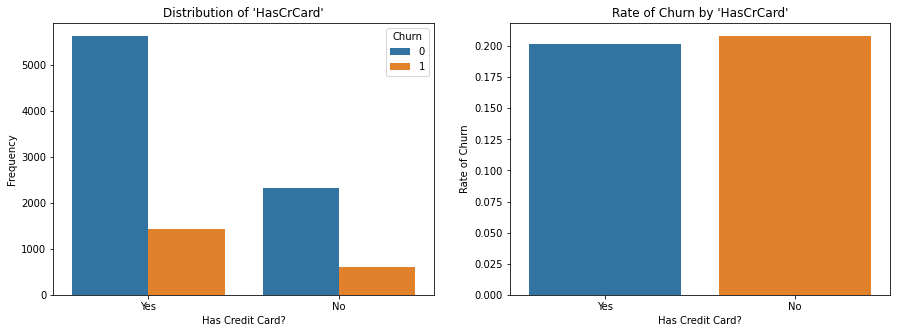

In [28]:
# Plots for 'HasCrCard' Variable

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))

sns.countplot(x = 'HasCrCard', hue = "Churn" , data = c_crc, ax=ax1)
ax1.set(xlabel='Has Credit Card?', ylabel='Frequency', title="Distribution of 'HasCrCard'")

sns.barplot(x = 'HasCrCard', y="Rate_Churn", data = c_crc, ax=ax2)
ax2.set(xlabel='Has Credit Card?', ylabel='Rate of Churn', title="Rate of Churn by 'HasCrCard'")

plt.show()

- A majority of customers do have a credit card, however it doesn't seem to gretly affect the churn rate.

In [29]:
# Copy Dataset and Create New Columns to Calculate Rate of Churn "Rate_Churn" by "IsActiveMember"

c_act=df.copy()
c_act['Count_Churn'] = c_act.groupby('IsActiveMember')['Churn'].transform('count')
c_act['Sum_Churn'] = c_act.groupby('IsActiveMember')['Churn'].transform(np.sum)
c_act['Rate_Churn']=c_act['Sum_Churn']/c_act['Count_Churn']
c_act.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,5151,735,0.142691
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,5151,735,0.142691
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4849,1302,0.268509
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,4849,1302,0.268509
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5151,735,0.142691


In [30]:
# Reclassifying Values

map=({0:"No", 1: "Yes"})
c_act["IsActiveMember"]=c_act["IsActiveMember"].replace(map)
c_act.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,1,Yes,101348.88,1,5151,735,0.142691
1,608,Spain,Female,41,1,83807.86,1,0,Yes,112542.58,0,5151,735,0.142691
2,502,France,Female,42,8,159660.80,3,1,No,113931.57,1,4849,1302,0.268509
3,699,France,Female,39,1,0.00,2,0,No,93826.63,0,4849,1302,0.268509
4,850,Spain,Female,43,2,125510.82,1,1,Yes,79084.10,0,5151,735,0.142691


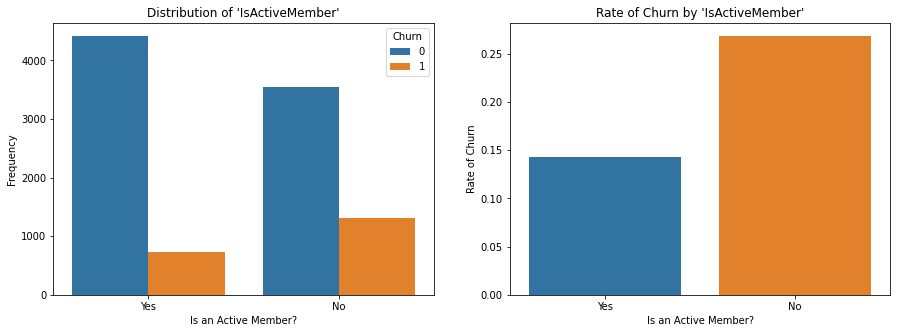

In [31]:
# Plots for 'IsActiveMember' Variable

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))

sns.countplot(x = 'IsActiveMember', hue = "Churn" , data = c_act, ax=ax1)
ax1.set(xlabel='Is an Active Member?', ylabel='Frequency', title="Distribution of 'IsActiveMember'")

sns.barplot(x = 'IsActiveMember', y="Rate_Churn", data = c_act, ax=ax2)
ax2.set(xlabel='Is an Active Member?', ylabel='Rate of Churn', title="Rate of Churn by 'IsActiveMember'")

plt.show()

- More customers than not are active members, however it doesn't seem to gretly affect the churn rate.

In [32]:
# Binning "EstimatedSalary"

c_sal=df.copy()
bins3=[0, 50000, 100000, 150000, 200000, 250000]
c_sal['Binned_sal']=pd.cut(c_sal['EstimatedSalary'],bins3).astype('object')
c_sal.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Binned_sal
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(100000, 150000]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(100000, 150000]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(100000, 150000]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(50000, 100000]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(50000, 100000]"


In [33]:
# Copy Dataset and Create New Columns to Calculate Rate of Churn "Rate_Churn" by "EstimatedSalary"

c_sal['Count_Churn'] = c_sal.groupby('Binned_sal')['Churn'].transform('count')
c_sal['Sum_Churn'] = c_sal.groupby('Binned_sal')['Churn'].transform(np.sum)
c_sal['Rate_Churn']=c_sal['Sum_Churn']/c_sal['Count_Churn']
c_sal.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Binned_sal,Count_Churn,Sum_Churn,Rate_Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(100000, 150000]",2555,517,0.202348
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(100000, 150000]",2555,517,0.202348
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(100000, 150000]",2555,517,0.202348
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(50000, 100000]",2537,504,0.198660
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(50000, 100000]",2537,504,0.198660


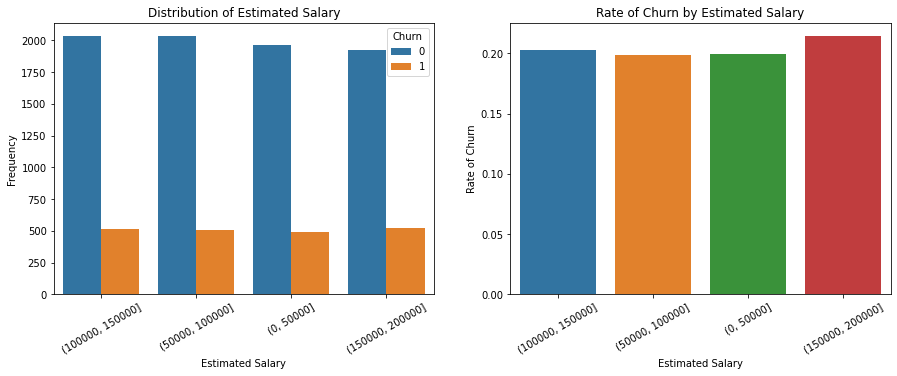

In [34]:
# Plots for 'EstimatedSalary' Variable

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))

sns.countplot(x = 'Binned_sal', hue = "Churn", data = c_sal, ax=ax1)
ax1.set(xlabel='Estimated Salary', ylabel='Frequency', title='Distribution of Estimated Salary')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30);

sns.barplot(x = 'Binned_sal', y="Rate_Churn", data = c_sal, ax=ax2)
ax2.set(xlabel='Estimated Salary', ylabel='Rate of Churn', title='Rate of Churn by Estimated Salary')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30);

plt.show()

- Each bin has about the same numbers of customers.
- The churn rates are also about the same, however the rate is slightly higher for salaries over 150,000.

#### Correlation Heatmap <a class="anchor" id="section_3_3"></a>

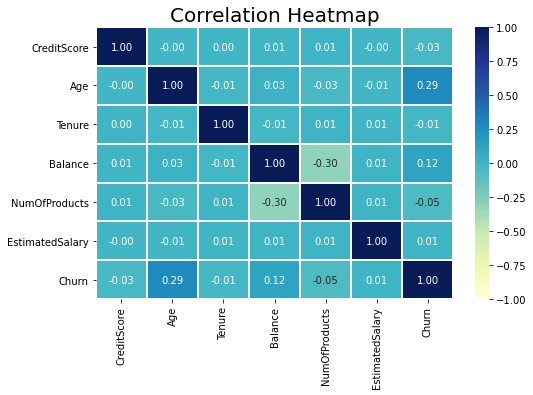

In [35]:
heat=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Churn']]
plt.figure(figsize=(8, 5))
sns.heatmap(heat.corr(), vmin=-1, vmax=1, annot=True, fmt= '.2f', cmap="YlGnBu", linecolor = "white", linewidths=1)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

- Age has the highest correlation with Churn with a value of 0.29.  Balance is second highest at 0.12.
- The remaining variables don't have much correlation with Churn.

### Setup Phase <a class="anchor" id="chapter4"></a>

This phase is necessary to ensure our data does not contain outliers and is ready for modeling.

#### Outliers <a class="anchor" id="section_4_1"></a>

In [36]:
# We will use boxplots with the non-binary numerical variables to identify any outliers

numerical=["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

def outlier_show(variable):
    
    sns.boxplot(x=df[variable])
    plt.show()

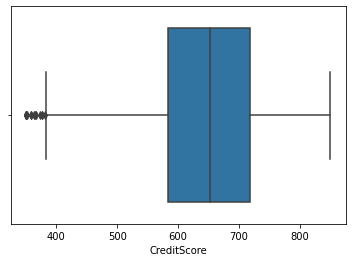

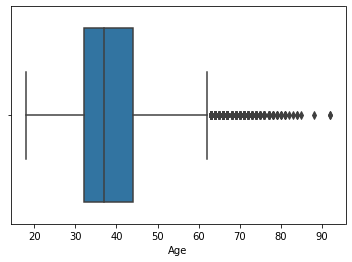

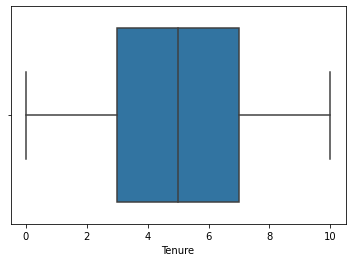

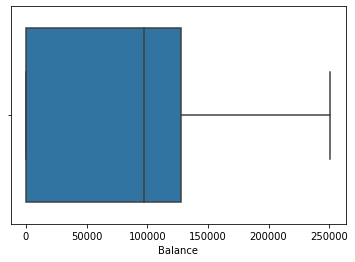

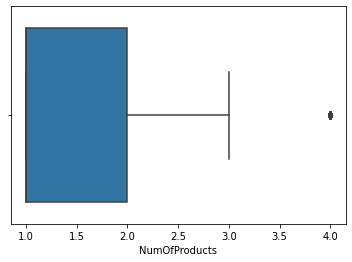

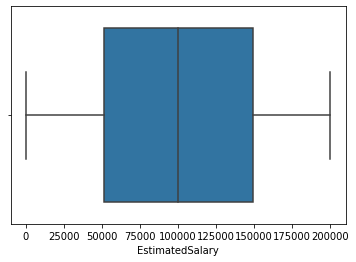

In [37]:
for x in numerical:
    outlier_show(x)

##### Viewing the boxplots we see outliers for CreditScore, Age, and NumOfProducts

In [38]:
df[['CreditScore', 'Age', 'NumOfProducts']].describe()

,CreditScore,Age,NumOfProducts
count,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,1.530200
std,96.653299,10.487806,0.581654
min,350.000000,18.000000,1.000000
25%,584.000000,32.000000,1.000000
50%,652.000000,37.000000,1.000000
75%,718.000000,44.000000,2.000000
max,850.000000,92.000000,4.000000


##### Viewing the statistics we determine the outliers by variable:

CreditScore: Values below 383

Age: Values above 62

NumOfProducts: Values above 3


In [39]:
# Removing Outliers

df=df[df['CreditScore']>= 383]
df=df[df['Age']<= 62]
df=df[df['NumOfProducts']<= 3]

In [40]:
df[['CreditScore', 'Age', 'NumOfProducts']].describe()

,CreditScore,Age,NumOfProducts
count,9568.000000,9568.000000,9568.000000
mean,650.690740,37.735786,1.515991
std,96.093507,8.782984,0.549766
min,383.000000,18.000000,1.000000
25%,584.000000,32.000000,1.000000
50%,652.000000,37.000000,1.000000
75%,717.000000,43.000000,2.000000
max,850.000000,62.000000,3.000000


##### The remaining records are all in range

In [41]:
df.shape

(9568, 11)

##### We are left with 9,568 records and the same 11 variables.  432 outliers were removed.

#### Creating Indicator Varibles <a class="anchor" id="section_4_2"></a>

These variables are created as binary variables for modeling.

In [42]:
df["NumOfProducts"] = df["NumOfProducts"].astype("category")
df["HasCrCard"] = df["HasCrCard"].astype("category")
df["IsActiveMember"] = df["IsActiveMember"].astype("category")

df = pd.get_dummies(df, columns = ["Country"])
df = pd.get_dummies(df, columns = ["Gender"])
df = pd.get_dummies(df, columns = ["NumOfProducts"])
df = pd.get_dummies(df, columns = ["HasCrCard"])
df = pd.get_dummies(df, columns = ["IsActiveMember"])

#### Data Partitioning <a class="anchor" id="section_4_3"></a>

We will partition our data to train and test sets using a 70/30 split.

In [43]:
x=df.copy()
x.drop(columns=["Churn"], inplace=True)
y=df["Churn"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 83)

### Modeling Phase <a class="anchor" id="chapter5"></a>

We will use three classification models: Decision Tree, Logistic Regression, and  Random Forest.

#### Decision Tree <a class="anchor" id="section_5_1"></a>

In [44]:
# Creating the Model

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

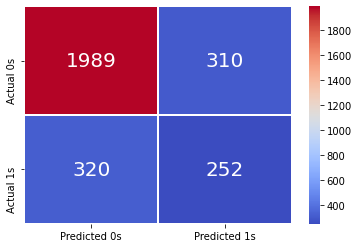

In [45]:
# Confusion Matrix with the Test Data

dtcm = confusion_matrix(y_test, y_preddt)

dtm=sns.heatmap(dtcm, annot=True,linewidths=1,linecolor="white",fmt = ".0f", cmap="coolwarm", annot_kws={"fontsize":20})
dtm.xaxis.set(ticks=(.5, 1.5), ticklabels=('Predicted 0s', 'Predicted 1s'))
dtm.yaxis.set(ticks=(.5, 1.5), ticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

#### Logistic Regression <a class="anchor" id="section_5_2"></a>

In [46]:
# Creating the Model

lr_model = LogisticRegression(solver = "liblinear", max_iter=500)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

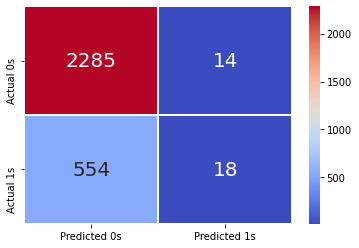

In [47]:
# Confusion Matrix with the Test Data

lrcm = confusion_matrix(y_test, lr_model.predict(x_test))

lrm=sns.heatmap(lrcm, annot=True,linewidths=1,linecolor="white",fmt = ".0f", cmap="coolwarm", annot_kws={"fontsize":20})
lrm.xaxis.set(ticks=(.5, 1.5), ticklabels=('Predicted 0s', 'Predicted 1s'))
lrm.yaxis.set(ticks=(.5, 1.5), ticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

#### Random Forest <a class="anchor" id="section_5_3"></a>

In [48]:
# Creating the Model

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)

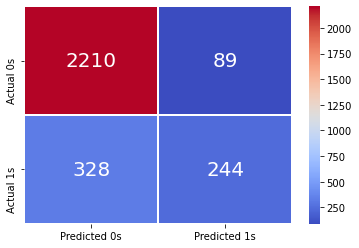

In [49]:
# Confusion Matrix with the Test Data

rfcm = confusion_matrix(y_test, y_predrf)

rfm=sns.heatmap(rfcm, annot=True,linewidths=1,linecolor="white",fmt = ".0f", cmap="coolwarm", annot_kws={"fontsize":20})
rfm.xaxis.set(ticks=(.5, 1.5), ticklabels=('Predicted 0s', 'Predicted 1s'))
rfm.yaxis.set(ticks=(.5, 1.5), ticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

### Evaluation Phase <a class="anchor" id="chapter6"></a>

#### Model Performance <a class="anchor" id="section_6_1"></a>

The models will be compared based on accuracy, sensitivity, and specificity.

In [50]:
# Formulas for Sensitivity and Specificity

# Decision Tree

sensitivitydt = dtcm[0,0]/(dtcm[0,0]+dtcm[1,0])
specificitydt = dtcm[1,1]/(dtcm[0,1]+dtcm[1,1])

# Logistic Regression

sensitivitylr = lrcm[0,0]/(lrcm[0,0]+lrcm[1,0])
specificitylr = lrcm[1,1]/(lrcm[0,1]+lrcm[1,1])

# Random Forest

sensitivityrf = rfcm[0,0]/(rfcm[0,0]+rfcm[1,0])
specificityrf = rfcm[1,1]/(rfcm[0,1]+rfcm[1,1])

In [51]:
# Comparing Models

print('-'*22)
print ('Decision Tree:')
print("Accuracy:   ", '{:.4%}'.format(metrics.accuracy_score(y_test, y_preddt)))
print("Sensitivity: {:.4%}".format(sensitivitydt))
print("Specificity: {:.4%}".format(specificitydt))
print('-'*22)
print ('Logistic Regression:')
print("Accuracy:    {:.4%}".format(lr_model.score(x_test,y_test)))
print("Sensitivity: {:.4%}".format(sensitivitylr))
print("Specificity: {:.4%}".format(specificitylr))
print('-'*22)
print ('Random Forest:')
print("Accuracy:   ", '{:.4%}'.format(metrics.accuracy_score(y_test, y_predrf)))
print("Sensitivity: {:.4%}".format(sensitivityrf))
print("Specificity: {:.4%}".format(specificityrf))

----------------------
Decision Tree:
Accuracy:    78.0564%
Sensitivity: 86.1412%
Specificity: 44.8399%
----------------------
Logistic Regression:
Accuracy:    80.2160%
Sensitivity: 80.4861%
Specificity: 56.2500%
----------------------
Random Forest:
Accuracy:    85.4754%
Sensitivity: 87.0764%
Specificity: 73.2733%


We see the Random Forest model performs best based on all three measures.  It's most accurate at over 85%, which beats the Logistic Regression model by 5%, and the Decision Tree model by 7%.  The sensitivity is highest at over 87% which slighly outperforms the Decision Tree model.  The specificity greatly outpeforms that of the other two models, however the Decision Tree model and the Logistic Regression model both have poor specificity masures.

#### Feature Importance <a class="anchor" id="section_6_2"></a>

Lastly, we will obtain the feature importances to see which features were most important for predicting Churn.

In [52]:
# Obtaining Feature Importance

for features, importance in zip(x.columns, rf.feature_importances_):
    print ('{f}, importance: {i:.4}'.format(f=features, i=importance))

CreditScore, importance: 0.1365
Age, importance: 0.2496
Tenure, importance: 0.08188
Balance, importance: 0.1459
EstimatedSalary, importance: 0.1411
Country_France, importance: 0.0121
Country_Germany, importance: 0.02279
Country_Spain, importance: 0.01063
Gender_Female, importance: 0.01107
Gender_Male, importance: 0.01003
NumOfProducts_1, importance: 0.02793
NumOfProducts_2, importance: 0.05066
NumOfProducts_3, importance: 0.04337
HasCrCard_0, importance: 0.01203
HasCrCard_1, importance: 0.0114
IsActiveMember_0, importance: 0.01828
IsActiveMember_1, importance: 0.01475


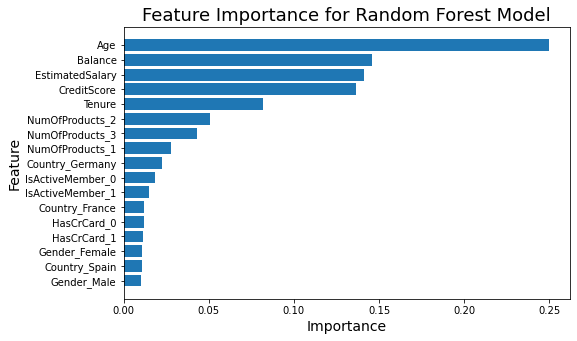

In [53]:
# Plotting Feature Importance

sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(8, 5))
feat=plt.barh(x.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance for Random Forest Model', fontsize=18)
plt.show()

We see that "Age" is by far the most important feature when predicting customer churn, with "Balance" and "Estimated Salary" rounding out the Top 3 features by importance.  Features "HasCrCard" and "Gender" are least important.

### Deployment Phase <a class="anchor" id="chapter7"></a>

In a typical deployment phase, these models would be used by the bank to predict if customers will churn in the future.  Since this is only a project, the final deliverable is the project itself. However, banks or other institutions where customer churn is an issue could perform a similar analysis and use the models to predict customer churn.